# Using mpld3 along with PyDSTool in an IPython notebook, for graphical and interactive exploration of ODE systems.

This is a simple test to show how [mpld3](http://mpld3.github.io/) can be used along with [PyDSTool](http://www.ni.gsu.edu/~rclewley/PyDSTool/FrontPage.html) to interactively explore PyDSTool sessions. For a simple "quickstart" overview of mpld3, have a look at [this notebook](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/mpld3_plugins.ipynb). 

I have concerns about whether it will truly be possible to use PyDSTool inside an IPython notebook, especially because of the concerns around removing compiled C integrators (e.g. Radau or Dopri) in order to force PyDSTool to recompile them, after a change has been made to the right hand side of the ODE system. 

Regardless, here is an attempt to try it out!

First, let's see if we can import PyDSTool.

In [1]:
import PyDSTool as dst

Success! Now let's see if we can set up a Dopri integrator, because C integrators are likely to be the tricky point. Naturally, we *must* try out the [a simple harmonic oscillator](http://www.ni.gsu.edu/~rclewley/PyDSTool/Tutorial/Tutorial_linear.html). Let's also take the opportunity to show off some of IPython's MathJaX provided math rendering capacity. Recall the ODE system for a simple harmonic oscillator:

\begin{cases}
    \dot{x} = y \\
    \dot{y} = -kx/m
\end{cases}

I would have liked to use ``\frac{-kx}{m}``, but the font size was too small to be readable, I think. See:

\begin{cases}
    \dot{x} = y \\
    \dot{y} = \frac{-kx}{m}
\end{cases}


In [2]:
icdict = {'x': 1, 'y': 0.4}
pardict = {'k': 0.1, 'm': 0.5}
vardict = {'x': 'y', 'y': '-k*x/m'}

DSargs = dst.args()               # create an empty object instance of the args class, call it DSargs
DSargs.name = 'SHM'               # name our model
DSargs.ics = icdict               # assign the icdict to the ics attribute
DSargs.pars = pardict             # assign the pardict to the pars attribute
DSargs.tdata = [0, 20]            # declare how long we expect to integrate for
DSargs.varspecs = vardict         # assign the vardict dictionary to the 'varspecs' attribute of DSargs

Now for the moment that we've been waiting for!

In [4]:
ode_sys = dst.Generator.Dopri_ODEsystem(DSargs)

running build_ext
running build_src
build_src
building py_modules sources
building extension "/home/brian/notebooks/dop853_temp._dop853_SHM_vf" sources
swig: /home/brian/notebooks/dop853_temp/dop853_SHM_vf.i
swig -python -I/home/brian/anaconda/lib/python2.7/site-packages/numpy/core/include -I/home/brian/notebooks -I/home/brian/anaconda/lib/python2.7/site-packages/PyDSTool/integrator -o /home/brian/notebooks/dop853_temp/dop853_SHM_vf_wrap.c -outdir /home/brian/notebooks/dop853_temp /home/brian/notebooks/dop853_temp/dop853_SHM_vf.i
build_src: building npy-pkg config files
customize UnixCCompiler
customize UnixCCompiler using build_ext
building '/home/brian/notebooks/dop853_temp._dop853_SHM_vf' extension
compiling C sources
C compiler: gcc -pthread -fno-strict-aliasing -g -O2 -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC

creating /home/brian/notebooks/dop853_temp/home
creating /home/brian/notebooks/dop853_temp/home/brian
creating /home/brian/notebooks/dop853_temp/home/brian/not

Success!

In [5]:
ode_sys

Generator SHM

In [6]:
traj = ode_sys.compute('demo')
pts = traj.sample()

Soon, we'll want to plot our points, so let's set up ``mpld3`` and ``matplotlib``.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()

Now let's make a plot.

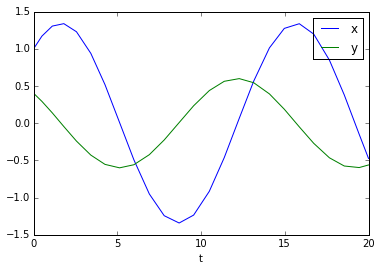

In [9]:
plt.plot(pts['t'], pts['x'], label='x')
plt.plot(pts['t'], pts['y'], label='y')
plt.legend()
plt.xlabel('t')

I'd like you to note that **this is not ordinary ``matplotlib`` plot!** It lets you zoom and pan. Mouse over the bottom right hand corner (where ``None`` is written for now), and select the zoom or pan features and use mouse away (I think middle mouse for zoom, and click+hold+drag for pan, also work).

# Isn't that amazing? 

Possibly not, let me know. I don't know why this doesn't work.

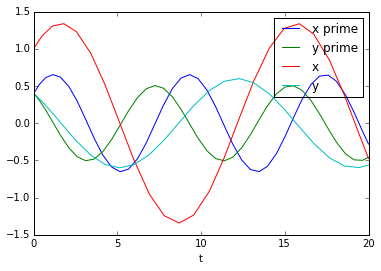

In [10]:
ode_sys.set(pars={'k': 0.3}, ics={'x': 0.4})
traj_prime = ode_sys.compute('demo 2')
pts_prime = traj_prime.sample()

plt.plot(pts_prime['t'], pts_prime['x'], label="x prime")
plt.plot(pts_prime['t'], pts_prime['y'], label="y prime")
plt.plot(pts['t'], pts['x'], label='x')
plt.plot(pts['t'], pts['y'], label='y')
plt.legend()
plt.xlabel('t')

### The End.

### post script

If we can get C integrators to work inside of IPython, that would be amazing, because we could interactively work with bifurcation diagrams, and so on, with *zoomable, pan-able* graphs, along with a "literate" exploration of the ODE system using IPython's capabilities.

That's a sure way to beat XPPAUT, no?